In [101]:
import numpy as np
import pandas as pd


In [102]:
'''Pulling in data and adding colummns'''
read_file = pd.read_csv('311-service-requests-from-2010-to-present.csv', nrows = 500000, low_memory = False)
data = read_file.to_numpy()
print(data[0])

[45050101 '2019-12-01T02:04:01.000' nan 'DOT'
 'Department of Transportation' 'Street Condition' 'Pothole' nan 10001.0
 'WEST   29 STREET' 'WEST   29 STREET' '5 AVENUE' 'BROADWAY' nan nan
 'BLOCKFACE' 'NEW YORK' nan nan 'Open' nan
 'The Department of Transportation referred this complaint to the appropriate Maintenance Unit for repair.'
 '2019-12-01T02:04:01.000' '05 MANHATTAN' nan 'MANHATTAN' 987653.0
 210944.0 'UNKNOWN' 'Unspecified' 'MANHATTAN' nan nan nan nan nan nan nan
 40.745668482774114 -73.9877188309367
 '{\'longitude\': \'-73.9877188309367\', \'latitude\': \'40.745668482774114\', \'human_address\': \'{"address": "", "city": "", "state": "", "zip": ""}\'}'
 nan nan nan nan nan]


In [103]:
"'Deleting columns with little utility.'"
np.delete(data, 4, axis=1)
np.delete(data,7,axis=1)

array([[45050101, '2019-12-01T02:04:01.000', nan, ..., nan, nan, nan],
       [45054936, '2019-12-01T01:59:41.000', nan, ..., nan, nan, nan],
       [45049329, '2019-12-01T01:59:08.000', nan, ..., nan, nan, nan],
       ...,
       [43868018, '2019-09-22T11:39:20.000', nan, ..., 4.0, 10.0, 1.0],
       [43867439, '2019-09-22T11:38:28.000', '2019-09-22T12:16:31.000',
        ..., 2.0, 25.0, 47.0],
       [43861543, '2019-09-22T11:38:12.000', nan, ..., 3.0, 16.0, 69.0]],
      dtype=object)

In [104]:
columns = list(range(0,46))

In [105]:
data = pd.DataFrame(data, columns = columns)

In [106]:
print(data)

              0                        1                        2     3   \
0       45050101  2019-12-01T02:04:01.000                      NaN   DOT   
1       45054936  2019-12-01T01:59:41.000                      NaN  NYPD   
2       45049329  2019-12-01T01:59:08.000                      NaN  NYPD   
3       45052046  2019-12-01T01:58:23.000                      NaN  NYPD   
4       45054999  2019-12-01T01:58:07.000                      NaN  NYPD   
...          ...                      ...                      ...   ...   
499995  43863796  2019-09-22T11:39:38.000  2019-09-22T20:09:28.000  NYPD   
499996  43865372  2019-09-22T11:39:25.000  2019-09-26T13:02:49.000   DPR   
499997  43868018  2019-09-22T11:39:20.000                      NaN   TLC   
499998  43867439  2019-09-22T11:38:28.000  2019-09-22T12:16:31.000  NYPD   
499999  43861543  2019-09-22T11:38:12.000                      NaN   DPR   

                                        4                           5   \
0            

In [107]:
data = data.drop(columns = [45,44, 43, 42, 41,40,37,36,35,28,24, 30,9,3,31,32,33,34,26,27,23,10,11,19,20,29,22,12,13,14,15,16,17,18,21], axis = 1)

In [108]:
data = data.rename(columns={0:"EventID", 25:"Borough", 1:"Date Created",2: "Date Resolved",4:"Agency", 5: "Complaint Type", 6: "Descriptor", 7:"Location Type", 8:"Zip", 38: "Longitude", 39: "Latitude"})

In [109]:
#Removing samples where we don't have a resolution date, as they're incomplete datapoints. 
data = data[data['Date Resolved'].notna()]


In [110]:
# Convert string representations to datetime objects
data['Date Created'] = pd.to_datetime(data['Date Created'])
data['Date Resolved'] = pd.to_datetime(data['Date Resolved'])

# Calculate the time taken in hours for each row
data['Hours Taken'] = (data['Date Resolved'] - data['Date Created']).dt.total_seconds() / 3600
data['Time Elapsed'] = data['Hours Taken']


# Convert hours to days
data['Days Taken'] = data['Hours Taken'] / 24

'" We discovered an error in the data: Some Resolutions are filed as *before* the report created date."'
data = data[(data['Time Elapsed'].notna()) & (data['Time Elapsed'] > 0)]
# Print the result

data

,EventID,Date Created,Date Resolved,Agency,Complaint Type,Descriptor,Location Type,Zip,Borough,Longitude,Latitude,Hours Taken,Time Elapsed,Days Taken
34,45053975,2019-12-01 01:48:45,2019-12-01 01:55:41,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10003.0,MANHATTAN,40.7315,-73.985571,0.115556,0.115556,0.004815
35,45050211,2019-12-01 01:48:31,2019-12-01 01:54:32,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10009.0,MANHATTAN,40.722316,-73.983214,0.100278,0.100278,0.004178
37,45050009,2019-12-01 01:48:20,2019-12-01 01:54:57,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10003.0,MANHATTAN,40.731788,-73.989691,0.110278,0.110278,0.004595
66,45049638,2019-12-01 01:36:06,2019-12-01 01:54:10,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,MANHATTAN,40.763233,-73.992863,0.301111,0.301111,0.012546
77,45051138,2019-12-01 01:31:56,2019-12-01 01:51:18,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032.0,MANHATTAN,40.8354,-73.943889,0.322778,0.322778,0.013449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,43865892,2019-09-22 11:40:28,2019-09-22 14:52:04,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11209.0,BROOKLYN,40.634294,-74.026625,3.193333,3.193333,0.133056
499994,43866870,2019-09-22 11:40:00,2019-09-23 12:00:00,Queens East 10,Missed Collection (All Materials),1 Missed Collection,Sidewalk,11414.0,QUEENS,40.656146,-73.836904,24.333333,24.333333,1.013889
499995,43863796,2019-09-22 11:39:38,2019-09-22 20:09:28,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11416.0,QUEENS,40.681553,-73.850258,8.497222,8.497222,0.354051
499996,43865372,2019-09-22 11:39:25,2019-09-26 13:02:49,Department of Parks and Recreation,Overgrown Tree/Branches,Hitting Building,Street,10467.0,BRONX,40.879794,-73.883435,97.390000,97.390000,4.057917


In [111]:
data.describe()

,Hours Taken,Time Elapsed,Days Taken
count,424411.000000,424411.000000,424411.000000
mean,72.080596,72.080596,3.003358
std,178.904543,178.904543,7.454356
min,0.000278,0.000278,0.000012
25%,2.384722,2.384722,0.099363
50%,8.515556,8.515556,0.354815
75%,52.895278,52.895278,2.203970
max,1618.442222,1618.442222,67.435093


In [112]:
from statistics import mean 
from statistics import mode

data = data.drop('Zip', axis=1) #drop zipcode
data['Location Type'] = data['Location Type'].fillna(mode(data['Location Type'].dropna()))
data['Descriptor'] = data['Descriptor'].fillna(mode(data['Descriptor'].dropna()))
data['Complaint Type'] = data['Complaint Type'].fillna(mode(data['Complaint Type'].dropna()))
data['Agency'] = data['Agency'].fillna(mode(data['Agency'].dropna()))
data['Longitude'] = data['Longitude'].fillna(mean(data['Longitude'].dropna()))
data['Latitude'] = data['Latitude'].fillna(mean(data['Latitude'].dropna()))

data_fit = data

In [113]:
data

,EventID,Date Created,Date Resolved,Agency,Complaint Type,Descriptor,Location Type,Borough,Longitude,Latitude,Hours Taken,Time Elapsed,Days Taken
34,45053975,2019-12-01 01:48:45,2019-12-01 01:55:41,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,MANHATTAN,40.731500,-73.985571,0.115556,0.115556,0.004815
35,45050211,2019-12-01 01:48:31,2019-12-01 01:54:32,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,MANHATTAN,40.722316,-73.983214,0.100278,0.100278,0.004178
37,45050009,2019-12-01 01:48:20,2019-12-01 01:54:57,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,MANHATTAN,40.731788,-73.989691,0.110278,0.110278,0.004595
66,45049638,2019-12-01 01:36:06,2019-12-01 01:54:10,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,MANHATTAN,40.763233,-73.992863,0.301111,0.301111,0.012546
77,45051138,2019-12-01 01:31:56,2019-12-01 01:51:18,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,MANHATTAN,40.835400,-73.943889,0.322778,0.322778,0.013449
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,43865892,2019-09-22 11:40:28,2019-09-22 14:52:04,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,BROOKLYN,40.634294,-74.026625,3.193333,3.193333,0.133056
499994,43866870,2019-09-22 11:40:00,2019-09-23 12:00:00,Queens East 10,Missed Collection (All Materials),1 Missed Collection,Sidewalk,QUEENS,40.656146,-73.836904,24.333333,24.333333,1.013889
499995,43863796,2019-09-22 11:39:38,2019-09-22 20:09:28,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,QUEENS,40.681553,-73.850258,8.497222,8.497222,0.354051
499996,43865372,2019-09-22 11:39:25,2019-09-26 13:02:49,Department of Parks and Recreation,Overgrown Tree/Branches,Hitting Building,Street,BRONX,40.879794,-73.883435,97.390000,97.390000,4.057917


In [114]:
# Here, we valuate the distribution among categories. 
agency = data['Agency'].value_counts().sort_index()
complaint_type = data['Complaint Type'].value_counts().sort_index()
descriptor = data['Descriptor'].value_counts().sort_index()
location_type = data['Location Type'].value_counts().sort_index()
borough = data['Borough'].value_counts().sort_index()


print(f"{agency}\n\n{complaint_type}\n\n{descriptor}\n\n{location_type}\n\n{borough}")

A - Bronx                                                         681
A - Brooklyn                                                     1478
A - Canine Task Force Citywide                                    259
A - Illegal Posting Manhattan and Bronx                            46
A - Illegal Posting Staten Island, Queens and Brooklyn            665
A - Manhattan                                                     629
A - Queens                                                        918
A - Staten Island                                                 687
BCC - Bronx                                                       684
BCC - Brooklyn North                                             1895
BCC - Brooklyn South                                             2603
BCC - Manhattan                                                   239
BCC - Queens East                                                1198
BCC - Queens West                                                 642
BCC - Staten Island 

In [115]:
#We're creating a copy of the original data to avoid copywarnings.
data_fit = data.copy()

#encode 'Borough'
boroughs = np.unique(data_fit['Borough'].dropna(), return_inverse=False)
for i in range(len(boroughs)):
    # replace each unique 'Borough' value with its corresponding index
    data_fit['Borough'][data_fit['Borough'] == boroughs[i]] = i

# print the DataFrame after encoding 'Borough'
print(data_fit)

# encode 'Complaint Type'
complaints = np.unique(data_fit['Complaint Type'].dropna(), return_inverse=False)
for i in range(len(complaints)):
    # replace each unique 'Complaint Type' value with its corresponding index
    data_fit['Complaint Type'][data_fit['Complaint Type'] == complaints[i]] = i

# encode 'Agency'
agencies = np.unique(data_fit['Agency'].dropna(), return_inverse=False)
for i in range(len(agencies)):
    # replace each unique 'Agency' value with its corresponding index
    data_fit['Agency'][data_fit['Agency'] == agencies[i]] = i

# encode 'Descriptor'
descriptors = np.unique(data_fit['Descriptor'].dropna(), return_inverse=False)
for i in range(len(descriptors)):
    # replace each unique 'Descriptor' value with its corresponding index
    data_fit['Descriptor'][data_fit['Descriptor'] == descriptors[i]] = i

# print the DataFrame after encoding 'Borough', 'Complaint Type', 'Agency', and 'Descriptor'
print(data_fit)

# encode 'Location Type'
locations = np.unique(data_fit['Location Type'].astype(str).dropna(), return_inverse=False)
for i in range(len(locations)):
    # replace each unique 'Location Type' value with its corresponding index
    data_fit['Location Type'][data_fit['Location Type'] == locations[i]] = i

data_fit

/var/folders/z0/0n0vj_d51hqb2b2tq_b6jr140000gn/T/ipykernel_1219/1034550032.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fit['Borough'][data_fit['Borough'] == boroughs[i]] = i
/var/folders/z0/0n0vj_d51hqb2b2tq_b6jr140000gn/T/ipykernel_1219/1034550032.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fit['Borough'][data_fit['Borough'] == boroughs[i]] = i
/var/folders/z0/0n0vj_d51hqb2b2tq_b6jr140000gn/T/ipykernel_1219/1034550032.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

         EventID        Date Created       Date Resolved  \
34      45053975 2019-12-01 01:48:45 2019-12-01 01:55:41   
35      45050211 2019-12-01 01:48:31 2019-12-01 01:54:32   
37      45050009 2019-12-01 01:48:20 2019-12-01 01:54:57   
66      45049638 2019-12-01 01:36:06 2019-12-01 01:54:10   
77      45051138 2019-12-01 01:31:56 2019-12-01 01:51:18   
...          ...                 ...                 ...   
499993  43865892 2019-09-22 11:40:28 2019-09-22 14:52:04   
499994  43866870 2019-09-22 11:40:00 2019-09-23 12:00:00   
499995  43863796 2019-09-22 11:39:38 2019-09-22 20:09:28   
499996  43865372 2019-09-22 11:39:25 2019-09-26 13:02:49   
499998  43867439 2019-09-22 11:38:28 2019-09-22 12:16:31   

                                    Agency                     Complaint Type  \
34         New York City Police Department                Noise - Residential   
35         New York City Police Department                 Noise - Commercial   
37         New York City Police Depa

/var/folders/z0/0n0vj_d51hqb2b2tq_b6jr140000gn/T/ipykernel_1219/1034550032.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fit['Complaint Type'][data_fit['Complaint Type'] == complaints[i]] = i
/var/folders/z0/0n0vj_d51hqb2b2tq_b6jr140000gn/T/ipykernel_1219/1034550032.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fit['Complaint Type'][data_fit['Complaint Type'] == complaints[i]] = i
/var/folders/z0/0n0vj_d51hqb2b2tq_b6jr140000gn/T/ipykernel_1219/1034550032.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

         EventID        Date Created       Date Resolved Agency  \
34      45053975 2019-12-01 01:48:45 2019-12-01 01:55:41     44   
35      45050211 2019-12-01 01:48:31 2019-12-01 01:54:32     44   
37      45050009 2019-12-01 01:48:20 2019-12-01 01:54:57     44   
66      45049638 2019-12-01 01:36:06 2019-12-01 01:54:10     44   
77      45051138 2019-12-01 01:31:56 2019-12-01 01:51:18     44   
...          ...                 ...                 ...    ...   
499993  43865892 2019-09-22 11:40:28 2019-09-22 14:52:04     44   
499994  43866870 2019-09-22 11:40:00 2019-09-23 12:00:00     46   
499995  43863796 2019-09-22 11:39:38 2019-09-22 20:09:28     44   
499996  43865372 2019-09-22 11:39:25 2019-09-26 13:02:49     31   
499998  43867439 2019-09-22 11:38:28 2019-09-22 12:16:31     44   

       Complaint Type Descriptor               Location Type Borough  \
34                 79        338  Residential Building/House       2   
35                 75        338            Store/C

/var/folders/z0/0n0vj_d51hqb2b2tq_b6jr140000gn/T/ipykernel_1219/1034550032.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fit['Location Type'][data_fit['Location Type'] == locations[i]] = i
/var/folders/z0/0n0vj_d51hqb2b2tq_b6jr140000gn/T/ipykernel_1219/1034550032.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fit['Location Type'][data_fit['Location Type'] == locations[i]] = i
/var/folders/z0/0n0vj_d51hqb2b2tq_b6jr140000gn/T/ipykernel_1219/1034550032.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

,EventID,Date Created,Date Resolved,Agency,Complaint Type,Descriptor,Location Type,Borough,Longitude,Latitude,Hours Taken,Time Elapsed,Days Taken
34,45053975,2019-12-01 01:48:45,2019-12-01 01:55:41,44,79,338,55,2,40.731500,-73.985571,0.115556,0.115556,0.004815
35,45050211,2019-12-01 01:48:31,2019-12-01 01:54:32,44,75,338,68,2,40.722316,-73.983214,0.100278,0.100278,0.004178
37,45050009,2019-12-01 01:48:20,2019-12-01 01:54:57,44,75,338,68,2,40.731788,-73.989691,0.110278,0.110278,0.004595
66,45049638,2019-12-01 01:36:06,2019-12-01 01:54:10,44,75,338,68,2,40.763233,-73.992863,0.301111,0.301111,0.012546
77,45051138,2019-12-01 01:31:56,2019-12-01 01:51:18,44,75,338,17,2,40.835400,-73.943889,0.322778,0.322778,0.013449
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,43865892,2019-09-22 11:40:28,2019-09-22 14:52:04,44,60,61,73,1,40.634294,-74.026625,3.193333,3.193333,0.133056
499994,43866870,2019-09-22 11:40:00,2019-09-23 12:00:00,46,70,0,62,3,40.656146,-73.836904,24.333333,24.333333,1.013889
499995,43863796,2019-09-22 11:39:38,2019-09-22 20:09:28,44,11,414,73,3,40.681553,-73.850258,8.497222,8.497222,0.354051
499996,43865372,2019-09-22 11:39:25,2019-09-26 13:02:49,31,85,275,69,0,40.879794,-73.883435,97.390000,97.390000,4.057917


In [116]:
data_fit

,EventID,Date Created,Date Resolved,Agency,Complaint Type,Descriptor,Location Type,Borough,Longitude,Latitude,Hours Taken,Time Elapsed,Days Taken
34,45053975,2019-12-01 01:48:45,2019-12-01 01:55:41,44,79,338,55,2,40.731500,-73.985571,0.115556,0.115556,0.004815
35,45050211,2019-12-01 01:48:31,2019-12-01 01:54:32,44,75,338,68,2,40.722316,-73.983214,0.100278,0.100278,0.004178
37,45050009,2019-12-01 01:48:20,2019-12-01 01:54:57,44,75,338,68,2,40.731788,-73.989691,0.110278,0.110278,0.004595
66,45049638,2019-12-01 01:36:06,2019-12-01 01:54:10,44,75,338,68,2,40.763233,-73.992863,0.301111,0.301111,0.012546
77,45051138,2019-12-01 01:31:56,2019-12-01 01:51:18,44,75,338,17,2,40.835400,-73.943889,0.322778,0.322778,0.013449
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,43865892,2019-09-22 11:40:28,2019-09-22 14:52:04,44,60,61,73,1,40.634294,-74.026625,3.193333,3.193333,0.133056
499994,43866870,2019-09-22 11:40:00,2019-09-23 12:00:00,46,70,0,62,3,40.656146,-73.836904,24.333333,24.333333,1.013889
499995,43863796,2019-09-22 11:39:38,2019-09-22 20:09:28,44,11,414,73,3,40.681553,-73.850258,8.497222,8.497222,0.354051
499996,43865372,2019-09-22 11:39:25,2019-09-26 13:02:49,31,85,275,69,0,40.879794,-73.883435,97.390000,97.390000,4.057917


In [117]:
from sklearn.model_selection import train_test_split
X = data_fit.drop('Time Elapsed',axis=1)
X = X.drop('Date Created',axis=1)
X = X.drop('EventID', axis =1)
X = X.drop('Date Resolved', axis=1)
X = X.drop('Hours Taken', axis=1)
X = X.drop('Days Taken',axis=1)

Y = data_fit[['Time Elapsed']].copy() 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [118]:
print(y_train)

        Time Elapsed
392163      0.166667
112206    114.520000
327488    802.551389
179408     39.809167
291123     50.154722
...              ...
308743    107.522222
432124      6.120000
166926    536.235278
185271      2.345000
154303     73.480833

[339528 rows x 1 columns]


In [119]:
print(X)

       Agency Complaint Type Descriptor Location Type Borough  Longitude  \
34         44             79        338            55       2  40.731500   
35         44             75        338            68       2  40.722316   
37         44             75        338            68       2  40.731788   
66         44             75        338            68       2  40.763233   
77         44             75        338            17       2  40.835400   
...       ...            ...        ...           ...     ...        ...   
499993     44             60         61            73       1  40.634294   
499994     46             70          0            62       3  40.656146   
499995     44             11        414            73       3  40.681553   
499996     31             85        275            69       0  40.879794   
499998     44             79         47            55       1  40.658186   

         Latitude  
34     -73.985571  
35     -73.983214  
37     -73.989691  
66     

## Gradient Boosting Trees

In [120]:
from sklearn.ensemble import GradientBoostingRegressor

model_gbr =  GradientBoostingRegressor(max_depth = 7, n_estimators = 300, learning_rate = .3).fit(X_train, y_train)
y_test_pred = model_gbr.predict(X_test) 
print(y_test_pred)

/Users/rh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 13.71590356  -1.39273125   7.40333356 ...  84.75301384 -10.34751553
  34.35755441]


In [121]:
X_train

,Agency,Complaint Type,Descriptor,Location Type,Borough,Longitude,Latitude
392163,26,74,376,73,3,40.721959,-73.809697
112206,29,52,204,52,2,40.721892,-73.979267
327488,23,50,81,73,3,40.764610,-73.889647
179408,29,52,204,52,1,40.640791,-73.962404
291123,29,52,204,52,0,40.870122,-73.884005
...,...,...,...,...,...,...,...
308743,29,52,204,52,1,40.654100,-73.960702
432124,44,80,338,73,0,40.854064,-73.882522
166926,29,117,249,52,1,40.692587,-73.959291
185271,44,81,98,73,2,40.866814,-73.925297


In [122]:
from sklearn.metrics import mean_squared_error
mse_gbr = mean_squared_error(y_test_pred, y_test)
print(mean_squared_error(y_test_pred, y_test))

4592.867318575641


'''Here, we briefly evaluate what features the model is most heavily weighting. '''
print(model_gbr.feature_importances_)
print(X.columns)

# Linear Regression as base model

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [124]:
# While GBT doesn't require normalizing the data, our other models do. 
X = data_fit.drop('Time Elapsed',axis=1)
X = X.drop('Date Created',axis=1)
X = X.drop('EventID', axis =1)
X = X.drop('Date Resolved', axis=1)
X = X.drop('Hours Taken', axis=1)
X = X.drop('Days Taken',axis=1)

Y = data_fit[['Time Elapsed']].copy()
print(type(X))  
print(type(Y)) 

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [125]:
# We again split the data. 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#scale X features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  a linear regression model
model_LR = LinearRegression()
model_LR.fit(X_train, y_train) # fit train set

# predictions on the testing data
y_pred = model_LR.predict(X_test)

# Evaluate the model performance
mse_LR = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse_LR}')

# Optionally, you can print the model coefficients
print('Model Coefficients:', model_LR.coef_)
print(X.columns)

Mean Squared Error: 29028.78234704074
Model Coefficients: [[-48.96546565   7.90466432  10.42511631 -15.35309013   3.27421854
   -1.51647098   4.1449885 ]]
Index(['Agency', 'Complaint Type', 'Descriptor', 'Location Type', 'Borough',
       'Longitude', 'Latitude'],
      dtype='object')


In [126]:
X_test

array([[ 0.80993808,  0.5711778 ,  0.80889145, ..., -1.45952401,
         1.64552115,  0.47307889],
       [ 0.80993808, -0.14256462, -0.57434311, ...,  1.11290041,
        -0.51329516,  1.14353811],
       [ 0.80993808, -0.14256462,  1.09054554, ..., -1.45952401,
         1.31941598,  0.699739  ],
       ...,
       [ 0.80993808, -1.73226364,  0.60234511, ..., -1.45952401,
         1.86601623,  0.26689687],
       [-1.60601646, -1.14829257, -1.66340561, ..., -0.6020492 ,
        -0.57003103, -0.35868047],
       [-1.08080895,  2.03110547,  1.0717686 , ...,  1.11290041,
        -0.68209108,  1.69295974]])

### Lasso Regression

In [127]:
from sklearn.linear_model import Lasso

'''To create another baseline, we also perform a lasso regression. '''

# Lasso regressor
alpha = 1.0  # adjust of you need
model_lasso = Lasso(alpha=alpha)

# fit the model to the training data
model_lasso.fit(X_train, y_train)

# make predictions on the test set
y_pred = model_lasso.predict(X_test)

# evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_lasso}")

print("Model Coefficients:", model_lasso.coef_)
print(X.columns)

Mean Squared Error: 29034.014533141784
Model Coefficients: [-47.98421642   6.89470892   9.26548746 -14.41008588   2.66370354
  -0.17083301   2.58074769]
Index(['Agency', 'Complaint Type', 'Descriptor', 'Location Type', 'Borough',
       'Longitude', 'Latitude'],
      dtype='object')


### Baseline MSE for Y


In [128]:
# We establish a baseline MSE 
baseline_prediction = np.mean(Y)

# MSE
baseline_mse = mean_squared_error(Y, [baseline_prediction] * len(Y))

print("Baseline MSE:", baseline_mse)
print("Linear Regression MSE:", mse_LR)
print("Lasso Regression MSE:", mse_lasso)
print("Gradient Boosting Tree MSE:", mse_gbr)

/Users/rh/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Baseline MSE: 32006.760004606633
Linear Regression MSE: 29028.78234704074
Lasso Regression MSE: 29034.014533141784
Gradient Boosting Tree MSE: 4592.867318575641


Notably, MSE for the linear regresion is lower than just for the baseline MSE. Still, GBT is outperforming the other models. 

## Neural Networks: 

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

## 2-Layers Perceptron

Epoch 1/20
8489/8489 [==============================] - 3s 350us/step - loss: 28254.8008 - val_loss: 27834.8066 - lr: 0.0010
Epoch 2/20
8489/8489 [==============================] - 3s 336us/step - loss: 26491.6016 - val_loss: 26899.2129 - lr: 0.0010
Epoch 3/20
8489/8489 [==============================] - 3s 328us/step - loss: 26055.0859 - val_loss: 26385.9375 - lr: 0.0010
Epoch 4/20
8489/8489 [==============================] - 3s 346us/step - loss: 25740.9805 - val_loss: 25996.2227 - lr: 0.0010
Epoch 5/20
8489/8489 [==============================] - 3s 339us/step - loss: 25539.6445 - val_loss: 25749.1816 - lr: 0.0010
Epoch 6/20
8489/8489 [==============================] - 3s 325us/step - loss: 25404.9297 - val_loss: 25521.9395 - lr: 0.0010
Epoch 7/20
8489/8489 [==============================] - 3s 344us/step - loss: 25287.9531 - val_loss: 25347.7461 - lr: 0.0010
Epoch 8/20
8489/8489 [==============================] - 3s 379us/step - loss: 25186.6562 - val_loss: 25167.1406 - lr: 0.0010


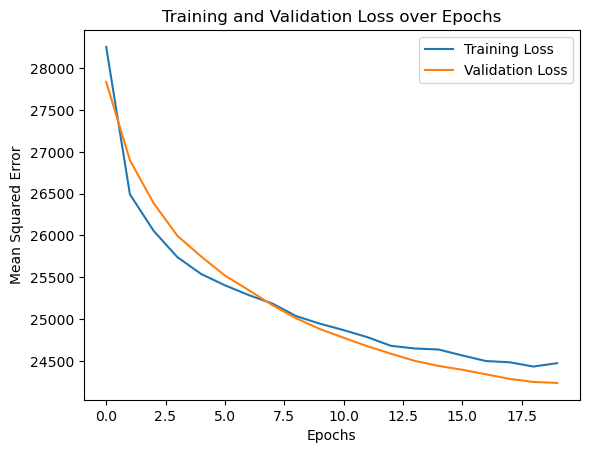

In [130]:
import tensorflow as tf
# a simple two-layer neural network
model_simple_2 = keras.Sequential([
    layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)), #kernel_regularizer=regularizers.l2(0.01),
    layers.Dropout(0.2), #dropout 20% of data
    layers.Dense(1)  # output layer
])

# learning rate schedule function
def lr_schedule(epoch):
    if epoch < 10:
        return 0.001
    else:
        return 0.001 * tf.math.exp(0.1 * (10 - epoch))

#inittial lernign rate
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
learning_rate_scheduler = LearningRateScheduler(lr_schedule)

# compile the model
model_simple_2.compile(optimizer=optimizer, loss='mean_squared_error')


# fit the model to the training data
history_simple = model_simple_2.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=learning_rate_scheduler)

# evaluate the simple model on the test set
mse_simple_nn = model_simple_2.evaluate(X_test, y_test)
print(f"Mean Squared Error for Simple Model: {mse_simple_nn}")

plt.plot(history_simple.history['loss'], label='Training Loss')
plt.plot(history_simple.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

## 3-Layers Perceptron

Epoch 1/20
8489/8489 [==============================] - 3s 374us/step - loss: 26514.4023 - val_loss: 25235.8730 - lr: 0.0010
Epoch 2/20
8489/8489 [==============================] - 3s 358us/step - loss: 24809.7773 - val_loss: 24460.7891 - lr: 0.0010
Epoch 3/20
8489/8489 [==============================] - 3s 354us/step - loss: 24158.1504 - val_loss: 23670.1230 - lr: 0.0010
Epoch 4/20
8489/8489 [==============================] - 3s 371us/step - loss: 23635.7051 - val_loss: 23095.2695 - lr: 0.0010
Epoch 5/20
8489/8489 [==============================] - 3s 408us/step - loss: 23026.3613 - val_loss: 22324.6445 - lr: 0.0010
Epoch 6/20
8489/8489 [==============================] - 3s 343us/step - loss: 22164.4492 - val_loss: 21707.3652 - lr: 0.0010
Epoch 7/20
8489/8489 [==============================] - 3s 323us/step - loss: 21331.2871 - val_loss: 20923.6523 - lr: 0.0010
Epoch 8/20
8489/8489 [==============================] - 3s 328us/step - loss: 20683.2754 - val_loss: 20572.1445 - lr: 0.0010


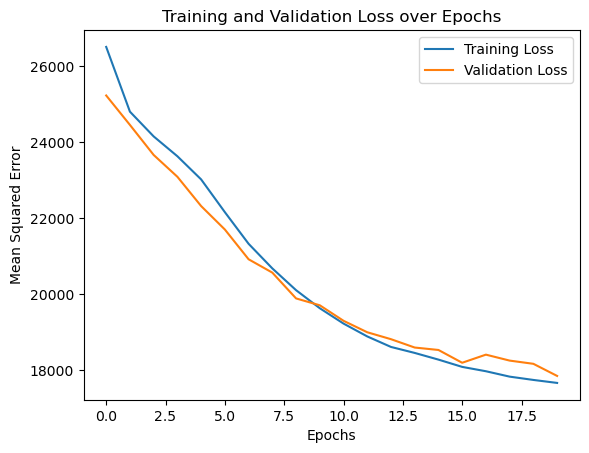

In [131]:
# We also seek to try a more complex neural network. 
model_complex_25 = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2), #dropout 20% of data
    layers.Dense(1)  # output layer with one neuron
])

# learning rate schedule function
def lr_schedule(epoch):
    if epoch < 10:
        return 0.001
    else:
        return 0.001 * tf.math.exp(0.1 * (10 - epoch))

#inittial lernign rate
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)

learning_rate_scheduler = LearningRateScheduler(lr_schedule)

# compile the model
model_complex_25.compile(optimizer=optimizer, loss='mean_squared_error')

# train the model 20 epochs
history = model_complex_25.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=learning_rate_scheduler)

# evaluate the complex model on the test set
mse_complex_3lnn_25 = model_complex_25.evaluate(X_test, y_test)
print(f"Mean Squared Error for Complex Model: {mse_complex_3lnn_25}")

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [132]:
model_complex_25.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 64)                512       
                                                                 
 dense_72 (Dense)            (None, 32)                2080      
                                                                 
 dropout_45 (Dropout)        (None, 32)                0         
                                                                 
 dense_73 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2625 (10.25 KB)
Trainable params: 2625 (10.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## ResNet 

In [133]:
# We are also going to build and try ResNET.

# define the residual block
def ResNet_block(x, units, dropout_rate=0.2):
    y = layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    y = layers.BatchNormalization()(y)
    y = layers.Dropout(dropout_rate)(y)
    y = layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l2(0.01))(y)
    y = layers.BatchNormalization()(y)
    y = layers.Dropout(dropout_rate)(y)
    return layers.add([x, y])

# the model architecture
inputs = layers.Input(shape=(X_train.shape[1],))
x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(inputs)

#ResNet blocks
x = ResNet_block(x, 64)
x = ResNet_block(x, 64)
#x = ResNet_block(x, 64)

#a dense layer with regularization and dropout
x = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.2)(x)

# output 
output = layers.Dense(1)(x)

#the model
model_DResNet = keras.Model(inputs=inputs, outputs=output)
model_DResNet.summary()

dot_img_file_DResNet = 'model_DResNet.png'
#plot_model(model_DResNet, to_file=dot_img_file_ResNet_U_Net, show_shapes=True)

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 7)]                  0         []                            
                                                                                                  
 dense_74 (Dense)            (None, 64)                   512       ['input_7[0][0]']             
                                                                                                  
 dense_75 (Dense)            (None, 64)                   4160      ['dense_74[0][0]']            
                                                                                                  
 batch_normalization_36 (Ba  (None, 64)                   256       ['dense_75[0][0]']            
 tchNormalization)                                                                          

Epoch 1/20
8489/8489 [==============================] - 7s 731us/step - loss: 22303.1523 - val_loss: 21956.0605 - lr: 0.0010
Epoch 2/20
8489/8489 [==============================] - 6s 712us/step - loss: 19768.5020 - val_loss: 41258.4844 - lr: 0.0010
Epoch 3/20
8489/8489 [==============================] - 6s 695us/step - loss: 19167.4238 - val_loss: 20792.2168 - lr: 0.0010
Epoch 4/20
8489/8489 [==============================] - 6s 709us/step - loss: 18710.9023 - val_loss: 33569.5039 - lr: 0.0010
Epoch 5/20
8489/8489 [==============================] - 6s 706us/step - loss: 18398.7871 - val_loss: 42164.9570 - lr: 0.0010
Epoch 6/20
8489/8489 [==============================] - 6s 716us/step - loss: 18250.3789 - val_loss: 19779.6094 - lr: 0.0010
Epoch 7/20
8489/8489 [==============================] - 6s 718us/step - loss: 18075.7168 - val_loss: 25052.7402 - lr: 0.0010
Epoch 8/20
8489/8489 [==============================] - 6s 690us/step - loss: 17814.0742 - val_loss: 21151.4629 - lr: 0.0010


Text(0, 0.5, 'Mean Squared Error')

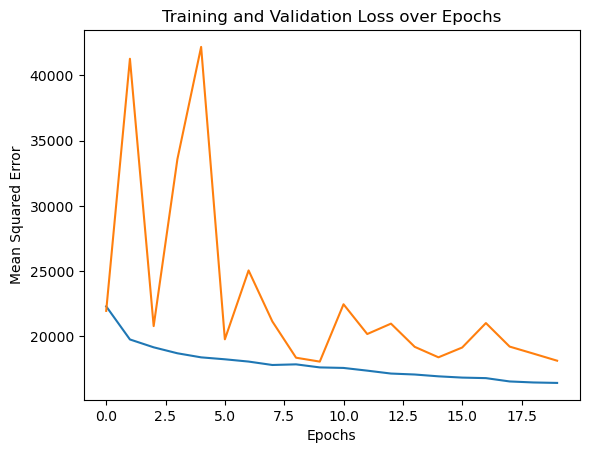

In [134]:
# We create a learning rate scheduling function. 
def lr_schedule(epoch):
    if epoch < 10:
        return 0.001
    else:
        return 0.001 * tf.math.exp(0.1 * (10 - epoch))

#Initial learning rate
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
learning_rate_scheduler = LearningRateScheduler(lr_schedule)

# compile model
model_DResNet.compile(optimizer=optimizer, loss='mean_squared_error')

# save training history  
history_DResNet = model_DResNet.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=learning_rate_scheduler)

# MSE the deep ResNet
mse_DResNet = model_DResNet.evaluate(X_test, y_test)
print(f"MSE Deep ResNet Model: {mse_DResNet}")


plt.plot(history_DResNet.history['loss'], label='Training Loss')
plt.plot(history_DResNet.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')

## DeepResNet U-Net like

In [135]:
# the residual block
def ResNet_block(x, units, dropout_rate=0.2):
    y = layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    y = layers.BatchNormalization()(y)
    y = layers.Dropout(dropout_rate)(y)
    y = layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l2(0.01))(y)
    y =layers.BatchNormalization()(y)
    y = layers.Dropout(dropout_rate)(y)
    return layers.add([x, y])

# encoder 
def encoder_block(x, units, dropout_rate=0.2):
    x = layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = ResNet_block(x, units, dropout_rate)
    return x

# decoder
def decoder_block(x, skip, units, dropout_rate=0.2):
    x = layers.Concatenate()([x, skip])
    x = layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = ResNet_block(x, units, dropout_rate)
    return x

# model 
inputs = layers.Input(shape=(X_train.shape[1],))

# encoder part
e1 = encoder_block(inputs, 64)
e2 = encoder_block(e1, 64)
e3 = encoder_block(e2, 32)

# decoder part
d3 = decoder_block(e3, e2, 32)
d2 = decoder_block(d3, e1, 64)

# output layer
output = layers.Dense(1)(d2)

# model
model_ResNet_U_Net = keras.Model(inputs=inputs, outputs=output)
model_ResNet_U_Net.summary()

dot_img_file_ResNet_U_Net = 'model_ResNet_U_Net.png'
#plot_model(model_ResNet_U_Net, to_file=dot_img_file_ResNet_U_Net, show_shapes=True)

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 7)]                  0         []                            
                                                                                                  
 dense_81 (Dense)            (None, 64)                   512       ['input_8[0][0]']             
                                                                                                  
 dense_82 (Dense)            (None, 64)                   4160      ['dense_81[0][0]']            
                                                                                                  
 batch_normalization_40 (Ba  (None, 64)                   256       ['dense_82[0][0]']            
 tchNormalization)                                                                          

Epoch 1/20
8489/8489 [==============================] - 13s 1ms/step - loss: 21547.8203 - val_loss: 19378.3672 - lr: 0.0010
Epoch 2/20
8489/8489 [==============================] - 11s 1ms/step - loss: 19128.0488 - val_loss: 19270.2988 - lr: 0.0010
Epoch 3/20
8489/8489 [==============================] - 11s 1ms/step - loss: 18469.8750 - val_loss: 19827.6504 - lr: 0.0010
Epoch 4/20
8489/8489 [==============================] - 11s 1ms/step - loss: 18039.3164 - val_loss: 17837.3555 - lr: 0.0010
Epoch 5/20
8489/8489 [==============================] - 11s 1ms/step - loss: 17630.1074 - val_loss: 17294.3203 - lr: 0.0010
Epoch 6/20
8489/8489 [==============================] - 12s 1ms/step - loss: 17417.2617 - val_loss: 17150.3613 - lr: 0.0010
Epoch 7/20
8489/8489 [==============================] - 11s 1ms/step - loss: 17135.7344 - val_loss: 16932.2422 - lr: 0.0010
Epoch 8/20
8489/8489 [==============================] - 11s 1ms/step - loss: 16977.3516 - val_loss: 16976.8008 - lr: 0.0010
Epoch 9/

Text(0, 0.5, 'Mean Squared Error')

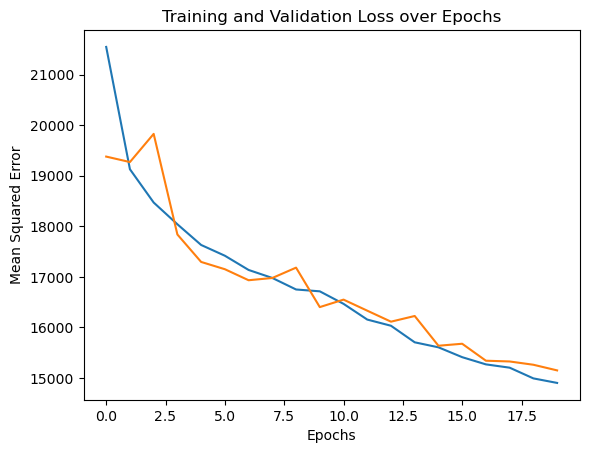

In [136]:
# learning rate schedule function
def lr_schedule(epoch):
    if epoch < 10:
        return 0.001
    else:
        return 0.001 * tf.math.exp(0.1 * (10 - epoch))

#inittial lernign rate
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
learning_rate_scheduler = LearningRateScheduler(lr_schedule)

# compile model
model_ResNet_U_Net.compile(optimizer=optimizer, loss='mean_squared_error')

# save training history  
history_ResNet_U_Net = model_ResNet_U_Net.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=learning_rate_scheduler)

# MSE the deep ResNet
mse_ResNet_U_Net = model_ResNet_U_Net.evaluate(X_test, y_test)
print(f"MSE Deep ResNet Model: {mse_ResNet_U_Net}")


plt.plot(history_ResNet_U_Net.history['loss'], label='Training Loss')
plt.plot(history_ResNet_U_Net.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')

Text(0, 0.5, 'Mean Squared Error')

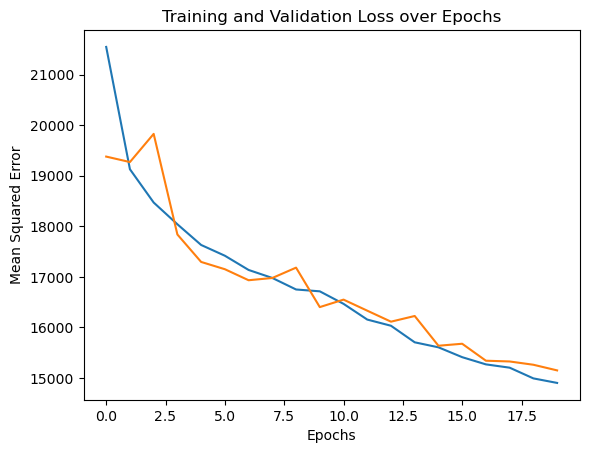

In [137]:
plt.plot(history_ResNet_U_Net.history['loss'], label='Training Loss')
plt.plot(history_ResNet_U_Net.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')

## Feature importance - through permutation

2653/2653 [==============================] - 1s 196us/step


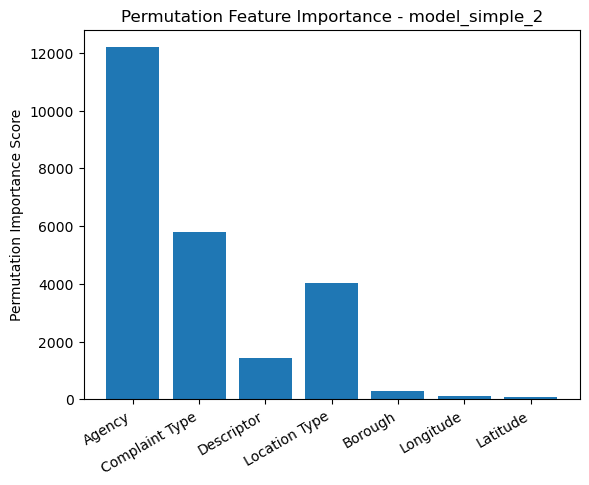

2653/2653 [==============================] - 1s 225us/step


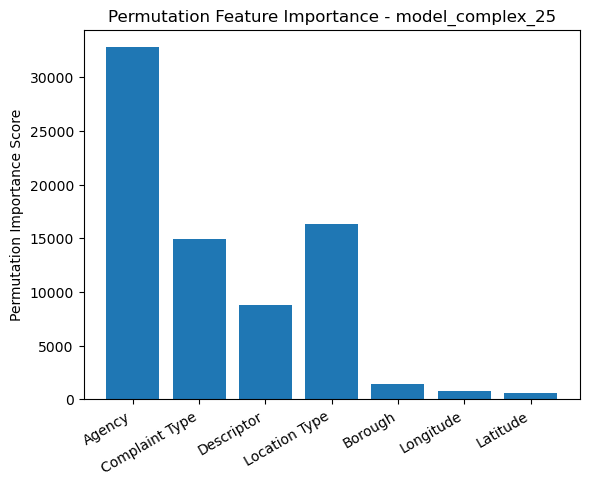

2653/2653 [==============================] - 1s 317us/step


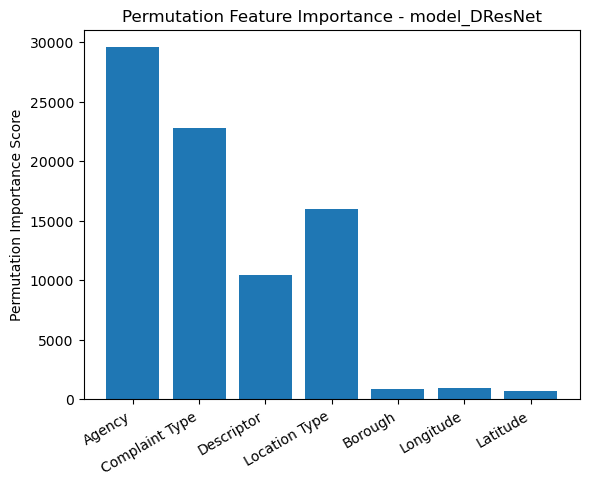

2653/2653 [==============================] - 1s 360us/step


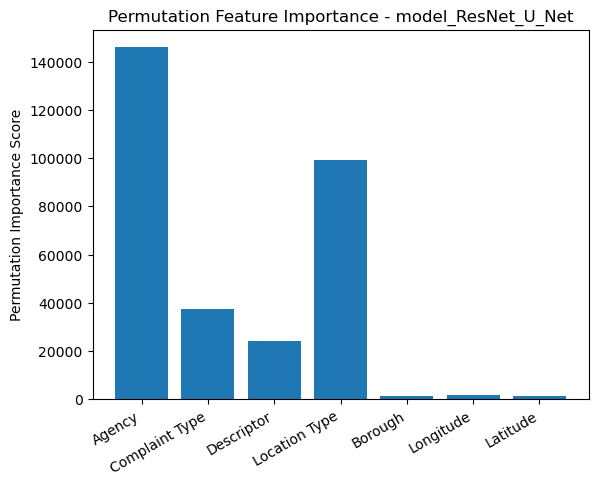

In [138]:
def permutation_importance(model, X, y, metric=mean_squared_error, num_permutations=100):
    baseline = metric(y, model.predict(X).flatten())
    importance_scores = []

    for col in range(X.shape[1]):
        permuted_X = X.copy()
        permuted_X[:, col] = np.random.permutation(permuted_X[:, col])
        permuted_score = metric(y, model.predict(permuted_X).flatten())
        importance_scores.append(permuted_score - baseline)

    return np.array(importance_scores)

# list of models
models = [model_simple_2, model_complex_25, model_DResNet, model_ResNet_U_Net]

# list of features
feature_names = ['Agency', 'Complaint Type', 'Descriptor', 'Location Type', 'Borough', 'Longitude', 'Latitude']

model_names = ['model_simple_2', 'model_complex_25', 'model_DResNet', 'model_ResNet_U_Net']


for model, model_name in zip(models, model_names):
    importance_scores = permutation_importance(model, X_test, y_test)

    # visualize 
    plt.bar(feature_names, importance_scores)
    plt.xticks(rotation=30, ha='right')
    plt.ylabel('Permutation Importance Score')
    plt.title(f'Permutation Feature Importance - {model_name}')
    plt.show(block=True) 

##### First, we evaluate the performance for GBR. 

/Users/rh/anaconda3/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/rh/anaconda3/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/rh/anaconda3/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/rh/anaconda3/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/rh/anaconda3/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/rh/anaco

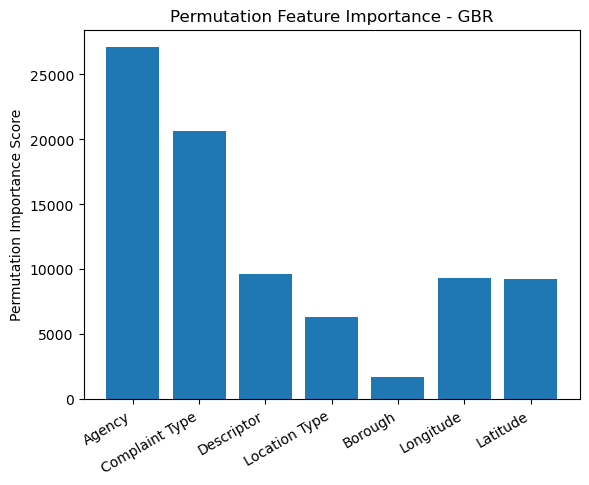

In [139]:
X_gbr = data_fit.drop('Time Elapsed',axis=1)
X_gbr = X_gbr.drop('Date Created',axis=1)
X_gbr = X_gbr.drop('EventID', axis =1)
X_gbr = X_gbr.drop('Date Resolved', axis=1)
X_gbr = X_gbr.drop('Hours Taken', axis=1)
X_gbr = X_gbr.drop('Days Taken',axis=1)

Y_gbr = data_fit[['Time Elapsed']].copy() 
X_gbr_train, X_gbr_test, y_gbr_train, y_gbr_test = train_test_split(X,Y,test_size=0.2, random_state=42)

def permutation_importance(model, X, y, metric=mean_squared_error, num_permutations=100):
    baseline = metric(y, model.predict(X).flatten())
    importance_scores = []

    for col in range(X.shape[1]):
        permuted_X = X.copy()
        permuted_X[:, col] = np.random.permutation(permuted_X[:, col])
        permuted_score = metric(y, model.predict(permuted_X).flatten())
        importance_scores.append(permuted_score - baseline)

    return np.array(importance_scores)

# Convert DataFrames to NumPy arrays
X_gbr_train_np = X_gbr_train.values
X_gbr_test_np = X_gbr_test.values
y_gbr_train_np = y_gbr_train.values.flatten()
y_gbr_test_np = y_gbr_test.values.flatten()

# Assuming you have defined the feature_names
feature_names = X_gbr_train.columns

importance_scores = permutation_importance(model_gbr, X_gbr_test_np, y_gbr_test_np)

plt.bar(feature_names, importance_scores)
plt.xticks(rotation=30, ha='right')
plt.ylabel('Permutation Importance Score')
plt.title(f'Permutation Feature Importance - GBR')  
plt.show()

In [140]:
import keras
from keras import layers, regularizers
from keras.utils import plot_model

# Assuming X_train is your training data
inputs = layers.Input(shape=(X_train.shape[1],))

# Define the layers of your model
x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(inputs)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1)(x)

# Create the model
model = keras.Model(inputs=inputs, outputs=outputs)

# Print the model summary to see the architecture and number of parameters
model.summary()

# Plot the model and save the image
dot_img_file = 'model_1.png'
plot_model(model, to_file=dot_img_file, show_shapes=True)


Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense_97 (Dense)            (None, 128)               1024      
                                                                 
 dropout_61 (Dropout)        (None, 128)               0         
                                                                 
 dense_98 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [141]:


# define the residual block
def ResNet_block(x, units, dropout_rate=0.2):
    y = layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    y = layers.BatchNormalization()(y)
    y = layers.Dropout(dropout_rate)(y)
    y = layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l2(0.01))(y)
    y = layers.BatchNormalization()(y)
    y = layers.Dropout(dropout_rate)(y)
    return layers.add([x, y])

# the model architecture
inputs_DResNet = layers.Input(shape=(X_train.shape[1],))
x_DResNet = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(inputs_DResNet)

# resNet blocks
x_DResNet = ResNet_block(x_DResNet, 64)
x_DResNet = ResNet_block(x_DResNet, 64)
x_DResNet = ResNet_block(x_DResNet, 64)

# a dense layer with regularization and dropout
x_DResNet = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x_DResNet)
x_DResNet = layers.Dropout(0.2)(x_DResNet)

# output 
output_DResNet = layers.Dense(1)(x_DResNet)

# The model
model_DResNet = keras.Model(inputs=inputs_DResNet, outputs=output_DResNet)
model_DResNet.summary()

# Plot the model and save the image in the current working directory
dot_img_file_DResNet = 'model_DResNet.png'
plot_model(model_DResNet, to_file=dot_img_file_DResNet, show_shapes=True)


Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 7)]                  0         []                            
                                                                                                  
 dense_99 (Dense)            (None, 64)                   512       ['input_10[0][0]']            
                                                                                                  
 dense_100 (Dense)           (None, 64)                   4160      ['dense_99[0][0]']            
                                                                                                  
 batch_normalization_50 (Ba  (None, 64)                   256       ['dense_100[0][0]']           
 tchNormalization)                                                                          

In [142]:
import keras
from keras import layers, regularizers
from keras.utils import plot_model

# Define the ResNet block
def ResNet_block(x, units, dropout_rate=0.2):
    y = layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    y = layers.BatchNormalization()(y)
    y = layers.Dropout(dropout_rate)(y)
    y = layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l2(0.01))(y)
    y = layers.BatchNormalization()(y)
    y = layers.Dropout(dropout_rate)(y)
    return layers.add([x, y])

# Encoder block
def encoder_block(x, units, dropout_rate=0.2):
    x = layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = ResNet_block(x, units, dropout_rate)
    return x

# Decoder block
def decoder_block(x, skip, units, dropout_rate=0.2):
    x = layers.Concatenate()([x, skip])
    x = layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = ResNet_block(x, units, dropout_rate)
    return x

# Model 
inputs_ResNet_U_Net = layers.Input(shape=(X_train.shape[1],))

# Encoder part
e1_ResNet_U_Net = encoder_block(inputs_ResNet_U_Net, 64)
e2_ResNet_U_Net = encoder_block(e1_ResNet_U_Net, 64)
e3_ResNet_U_Net = encoder_block(e2_ResNet_U_Net, 32)

# Decoder part
d3_ResNet_U_Net = decoder_block(e3_ResNet_U_Net, e2_ResNet_U_Net, 32)
d2_ResNet_U_Net = decoder_block(d3_ResNet_U_Net, e1_ResNet_U_Net, 64)

# Output layer
output_ResNet_U_Net = layers.Dense(1)(d2_ResNet_U_Net)

# Model
model_ResNet_U_Net = keras.Model(inputs=inputs_ResNet_U_Net, outputs=output_ResNet_U_Net)
model_ResNet_U_Net.summary()

# Plot the model and save the image in the current working directory
dot_img_file_ResNet_U_Net = 'model_ResNet_U_Net.png'
plot_model(model_ResNet_U_Net, to_file=dot_img_file_ResNet_U_Net, show_shapes=True)


Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 7)]                  0         []                            
                                                                                                  
 dense_108 (Dense)           (None, 64)                   512       ['input_11[0][0]']            
                                                                                                  
 dense_109 (Dense)           (None, 64)                   4160      ['dense_108[0][0]']           
                                                                                                  
 batch_normalization_56 (Ba  (None, 64)                   256       ['dense_109[0][0]']           
 tchNormalization)                                                                         

## Model evaluations

We have now built four different models (GBT, two neural networks, and resnet) that we can evaluate.

In [170]:
Y

,Time Elapsed
1,12.965833
2,0.150833
3,0.099722
4,17.637778
5,558.321111
...,...
99994,3.193333
99995,24.333333
99996,8.497222
99997,97.390000


In [1]:
from sklearn.model_selection import cross_val_score, KFold  
from sklearn.metrics import mean_squared_error
def compute_mean(lst):
    return np.mean(lst)

scoring_metric = 'your_scoring_metric'
num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

fold_means = []

for train_index, test_index in kf.split(X):
    #iloc because its panda
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    #mse
    fold_metric = mean_squared_error(y_test, [np.mean(y_test)] * len(y_test) )

    # mse append
    fold_means.append(fold_metric)

mean_across_folds = compute_mean(fold_means)
mean_std = np.std(fold_means)

print(f'Mean Squared Error across {num_folds} folds: {mean_across_folds} +/- {mean_std}')

NameError: name 'X' is not defined

In [143]:
from sklearn.model_selection import cross_val_score, KFold  
from sklearn.metrics import mean_squared_error

# perform Cross-validation on the all models. Calculate the MSE for each model
# 5 fold cross-vall. 
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Kfolds

# models: model_gbr, model_LR, model_lasso, model_simple_2, model_complex, model_complex_25, model_DResNet
LR_scores_mse = -cross_val_score(model_LR, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
gbr_scores_mse = -cross_val_score(model_gbr, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
lasso_scores_mse = -cross_val_score(model_lasso, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

print("Linear Regression - MSE:", np.mean(LR_scores_mse))
print("Lasso Regression - MSE:", np.mean(lasso_scores_mse))
print("Gradient Boosting Decision Trees - MSE:", np.mean(gbr_scores_mse))

/Users/rh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Linear Regression - MSE: 29051.178106767016
Lasso Regression - MSE: 29058.633290807164
Gradient Boosting Decision Trees - MSE: 5023.596533527438


In [144]:
print("Linear Regression - MSE: ", np.mean(LR_scores_mse),"+/-", np.std(LR_scores_mse))
print("Lasso Regression -  MSE: ", np.mean(lasso_scores_mse),"+/-", np.std(lasso_scores_mse))
print("GB Regression -     MSE: ", np.mean(gbr_scores_mse),"+/-", np.std(gbr_scores_mse))

Linear Regression - MSE:  29051.178106767016 +/- 366.8225028327076
Lasso Regression -  MSE:  29058.633290807164 +/- 368.1234077270799
GB Regression -     MSE:  5023.596533527438 +/- 140.04803319963463


In [145]:
# save errors here
nn_simple_2_scores_mse = []

# convert X_train and y_train to numpy arrays to make indexing consistent
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)
# new model for each fold
model_fold = keras.Sequential([
    layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train.shape[1],)), #kernel_regularizer=regularizers.l2(0.01),
    layers.Dropout(0.2), #dropout 20% of data
    layers.Dense(1)  # output layer
])

# compile it

model_fold.compile(optimizer='adam', loss='mean_squared_error')

# itereate for each fold
for train_index, val_index in kf.split(X_train_np):
    X_train_fold, X_val_fold = X_train_np[train_index], X_train_np[val_index]
    y_train_fold, y_val_fold = y_train_np[train_index], y_train_np[val_index]

    # fit for each fold
    model_fold.fit(X_train_fold, y_train_fold, epochs=20, batch_size=32, verbose=0)

    # MSE for each fold
    mse_fold = model_fold.evaluate(X_val_fold, y_val_fold, verbose=0)

    # append MSE
    nn_simple_2_scores_mse.append(mse_fold)

# average MSE for all folds
average_nn_simple_2_scores_mse = np.mean(nn_simple_2_scores_mse)

# STD of MSE
std_nn_simple_2_scores_mse = np.std(nn_simple_2_scores_mse)

print("Average MSE across 5 folds for simple 2 layers NN : ", average_nn_simple_2_scores_mse, "+/-", std_nn_simple_2_scores_mse)

Average MSE across 5 folds for simple 2 layers NN :  22401.271484375 +/- 809.7464099753809


In [146]:
# save errors here
nn_complex_scores_mse = []
# new model for each fold
model_fold_3 = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2), #dropout 20% of data
    layers.Dense(1)  # output layer with one neuron
])
    
# compile it
model_fold_3.compile(optimizer='adam', loss='mean_squared_error')

# itereate for each fold
for train_index, val_index in kf.split(X_train_np):
    X_train_fold, X_val_fold = X_train_np[train_index], X_train_np[val_index]
    y_train_fold, y_val_fold = y_train_np[train_index], y_train_np[val_index]

    # fit for each fold
    model_fold_3.fit(X_train_fold, y_train_fold, epochs=20, batch_size=32, verbose=0)

    # MSE for each fold
    mse_fold = model_fold_3.evaluate(X_val_fold, y_val_fold, verbose=0)

    # append MSE
    nn_complex_scores_mse.append(mse_fold)
    
# average MSE for all folds
average_nn_complex_scores_mse = np.mean(nn_complex_scores_mse)

# STD of MSE
std_nn_complex_scores_mse = np.std(nn_complex_scores_mse)

print("Average MSE across 5 folds for complex NN: ", average_nn_complex_scores_mse, "+/-", std_nn_complex_scores_mse)


Average MSE across 5 folds for complex NN:  16339.8138671875 +/- 789.0722164744427


In [147]:
# save errors here
DResNet_scores_mse = []

def ResNet_block(x, units, dropout_rate=0.2):
    y = layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    y = layers.BatchNormalization()(y)
    y = layers.Dropout(dropout_rate)(y)
    y = layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l2(0.01))(y)
    y = layers.BatchNormalization()(y)
    y = layers.Dropout(dropout_rate)(y)
    return layers.add([x, y])

# the model architecture
inputs = layers.Input(shape=(X_train.shape[1],))
x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(inputs)

#ResNet blocks
x = ResNet_block(x, 64)
x = ResNet_block(x, 64)
x = ResNet_block(x, 64)

#a dense layer with regularization and dropout
x = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.2)(x)

# output 
output = layers.Dense(1)(x)

#the model
model_fold_resnet = keras.Model(inputs=inputs, outputs=output)

model_fold_resnet.compile(optimizer='adam', loss='mean_squared_error')

# itereate for each fold
for train_index, val_index in kf.split(X_train_np):
    X_train_fold, X_val_fold = X_train_np[train_index], X_train_np[val_index]
    y_train_fold, y_val_fold = y_train_np[train_index], y_train_np[val_index]

    # fit for each fold
    model_fold_resnet.fit(X_train_fold, y_train_fold, epochs=20, batch_size=32, verbose=0)

    # MSE for each fold
    mse_fold = model_fold_resnet.evaluate(X_val_fold, y_val_fold, verbose=0)

    # append MSE
    DResNet_scores_mse.append(mse_fold)
    
# average MSE for all folds
average_DResNet_scores_mse = np.mean(DResNet_scores_mse)

# STD of MSE
std_DResNet_scores_mse = np.std(DResNet_scores_mse)

print("Average MSE across 5 folds for DResNet model: ", average_DResNet_scores_mse, "+/-", std_DResNet_scores_mse)


Average MSE across 5 folds for DResNet model:  19422.296875 +/- 3537.3024587896653


In [173]:
print("Linear Regression - MSE: ", np.mean(LR_scores_mse),"+/-", np.std(LR_scores_mse))
print("Lasso Regression -  MSE: ", np.mean(lasso_scores_mse),"+/-", np.std(lasso_scores_mse))
print("GB Regression -     MSE: ", np.mean(gbr_scores_mse),"+/-", np.std(gbr_scores_mse))
print("Simple 2 layers NN- MSE: ", average_nn_simple_2_scores_mse, "+/-", std_nn_simple_2_scores_mse)
print("3 layers NN -       MSE: ", average_nn_complex_scores_mse, "+/-", std_nn_complex_scores_mse)
print("3 layers DResNet -  MSE: ", average_DResNet_scores_mse, "+/-", std_DResNet_scores_mse)

Linear Regression - MSE:  29051.178106767016 +/- 366.8225028327076
Lasso Regression -  MSE:  29058.633290807164 +/- 368.1234077270799
GB Regression -     MSE:  5023.596533527438 +/- 140.04803319963463
Simple 2 layers NN- MSE:  22401.271484375 +/- 809.7464099753809
3 layers NN -       MSE:  16339.8138671875 +/- 789.0722164744427
3 layers DResNet -  MSE:  19422.296875 +/- 3537.3024587896653


## Final model selection

In [198]:
'''Now, we are evaluating the system on out-of-sample predictions. '''
#generate out of sample data after the data we used. Strat row 500000 and reas 50k rows
start_row = 1000000
num_rows_to_read = 100000

# out os sample data set for testing 
df_subset = pd.read_csv("311-service-requests-from-2010-to-present.csv", skiprows=range(1, start_row), nrows=num_rows_to_read, low_memory=False)
df_subset.to_csv("outofsample_100000_2.csv", index=False)

#### Read out of sample data

In [199]:
read_outofsample = pd.read_csv('outofsample_100000_2.csv',low_memory = False)
outofsample = read_outofsample.to_numpy()
print(outofsample[0])

[43861543 '2019-09-22T11:38:12.000' nan 'DPR'
 'Department of Parks and Recreation' 'Damaged Tree'
 'Tree Alive - in Poor Condition' 'Street' 11362.0 '60-23 246 PLACE'
 '246 PLACE' '60 AVENUE' '61 AVENUE' '60 AVENUE' '61 AVENUE' nan
 'LITTLE NECK' '246 PLACE' nan 'In Progress' nan
 'The Department of Parks and Recreation has reviewed this request and will visit the location to inve'
 '2019-09-24T13:46:00.000' '11 QUEENS' 4083040056.0 'QUEENS' 1058738.0
 215369.0 'MOBILE' 'Unspecified' 'QUEENS' nan nan nan nan nan nan nan
 40.75750087388981 -73.73113027986656
 '{\'longitude\': \'-73.73113027986656\', \'latitude\': \'40.75750087388981\', \'human_address\': \'{"address": "", "city": "", "state": "", "zip": ""}\'}'
 14197.0 26.0 3.0 16.0 69.0]


In [200]:
np.delete(outofsample, 4, axis=1)
np.delete(outofsample,7,axis=1)

array([[43861543, '2019-09-22T11:38:12.000', nan, ..., 3.0, 16.0, 69.0],
       [43878576, '2019-09-24T02:45:20.000', '2019-09-24T15:43:17.000',
        ..., 3.0, 46.0, 60.0],
       [43877031, '2019-09-24T02:44:25.000', '2019-09-24T02:53:28.000',
        ..., 3.0, 30.0, 62.0],
       ...,
       [43865372, '2019-09-22T11:39:25.000', '2019-09-26T13:02:49.000',
        ..., 5.0, 40.0, 34.0],
       [43868018, '2019-09-22T11:39:20.000', nan, ..., 4.0, 10.0, 1.0],
       [43867439, '2019-09-22T11:38:28.000', '2019-09-22T12:16:31.000',
        ..., 2.0, 25.0, 47.0]], dtype=object)

In [201]:
columns = list(range(0,46))

In [202]:
outofsample = pd.DataFrame(outofsample, columns = columns)
outofsample = outofsample.drop(columns = [45,44, 43, 42, 41,40,37,36,35,28,24, 30,9,3,31,32,33,34,26,27,23,10,11,19,20,29,22,12,13,14,15,16,17,18,21], axis = 1)

In [203]:
outofsample = outofsample.rename(columns={0:"EventID", 25:"Borough", 1:"Date Created",2: "Date Resolved",4:"Agency", 5: "Complaint Type", 6: "Descriptor", 7:"Location Type", 8:"Zip", 38: "Longitude", 39: "Latitude"})

In [204]:
#Creating a response time variable
outofsample = outofsample[outofsample['Date Resolved'].notna()]
outofsample

,EventID,Date Created,Date Resolved,Agency,Complaint Type,Descriptor,Location Type,Zip,Borough,Longitude,Latitude
1,43878576,2019-09-24T02:45:20.000,2019-09-24T15:43:17.000,New York City Police Department,Blocked Driveway,No Access,NaN,11419.0,QUEENS,40.690982,-73.827317
2,43877031,2019-09-24T02:44:25.000,2019-09-24T02:53:28.000,New York City Police Department,Noise - Vehicle,Engine Idling,Street/Sidewalk,11385.0,QUEENS,40.699215,-73.90659
3,43884984,2019-09-24T02:43:18.000,2019-09-24T02:49:17.000,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10022.0,MANHATTAN,40.7594,-73.961474
4,43880286,2019-09-24T02:40:20.000,2019-09-24T20:18:36.000,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10455.0,BRONX,40.815713,-73.906539
5,43881017,2019-09-24T02:38:13.000,2019-10-17T08:57:29.000,Department of Housing Preservation and Develop...,PLUMBING,TOILET,RESIDENTIAL BUILDING,10303.0,STATEN ISLAND,40.626065,-74.150936
...,...,...,...,...,...,...,...,...,...,...,...
99994,43865892,2019-09-22T11:40:28.000,2019-09-22T14:52:04.000,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11209.0,BROOKLYN,40.634294,-74.026625
99995,43866870,2019-09-22T11:40:00.000,2019-09-23T12:00:00.000,Queens East 10,Missed Collection (All Materials),1 Missed Collection,Sidewalk,11414.0,QUEENS,40.656146,-73.836904
99996,43863796,2019-09-22T11:39:38.000,2019-09-22T20:09:28.000,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11416.0,QUEENS,40.681553,-73.850258
99997,43865372,2019-09-22T11:39:25.000,2019-09-26T13:02:49.000,Department of Parks and Recreation,Overgrown Tree/Branches,Hitting Building,Street,10467.0,BRONX,40.879794,-73.883435


In [205]:
from statistics import mean, mode

outofsample = outofsample.drop('Zip', axis=1) #drop zipcode
outofsample['Location Type'] = outofsample['Location Type'].fillna(mode(outofsample['Location Type'].dropna()))
outofsample['Descriptor'] = outofsample['Descriptor'].fillna(mode(outofsample['Descriptor'].dropna()))
outofsample['Complaint Type'] = outofsample['Complaint Type'].fillna(mode(outofsample['Complaint Type'].dropna()))
outofsample['Agency'] = outofsample['Agency'].fillna(mode(outofsample['Agency'].dropna()))
outofsample['Longitude'] = outofsample['Longitude'].fillna(mean(outofsample['Longitude'].dropna()))
outofsample['Latitude'] = outofsample['Latitude'].fillna(mean(outofsample['Latitude'].dropna()))


In [206]:
# Encode 'Borough'
boroughs = np.unique(outofsample['Borough'].dropna(), return_inverse=False)
for i in range(len(boroughs)):
    # Replace each unique 'Borough' value with its corresponding index
    outofsample['Borough'][outofsample['Borough'] == boroughs[i]] = i

# Print the DataFrame after encoding 'Borough'
print(outofsample)

# Encode 'Complaint Type'
complaints = np.unique(outofsample['Complaint Type'].dropna(), return_inverse=False)
for i in range(len(complaints)):
    # Replace each unique 'Complaint Type' value with its corresponding index
    outofsample['Complaint Type'][outofsample['Complaint Type'] == complaints[i]] = i

# Encode 'Agency'
agencies = np.unique(outofsample['Agency'].dropna(), return_inverse=False)
for i in range(len(agencies)):
    # Replace each unique 'Agency' value with its corresponding index
    outofsample['Agency'][outofsample['Agency'] == agencies[i]] = i

# Encode 'Descriptor'
descriptors = np.unique(outofsample['Descriptor'].dropna(), return_inverse=False)
for i in range(len(descriptors)):
    # Replace each unique 'Descriptor' value with its corresponding index
    outofsample['Descriptor'][outofsample['Descriptor'] == descriptors[i]] = i

# Print the DataFrame after encoding 'Borough', 'Complaint Type', 'Agency', and 'Descriptor'
print(outofsample)

# Encode 'Location Type'
locations = np.unique(outofsample['Location Type'].astype(str).dropna(), return_inverse=False)
for i in range(len(locations)):
    # Replace each unique 'Location Type' value with its corresponding index
    outofsample['Location Type'][outofsample['Location Type'] == locations[i]] = i

decoded_df = outofsample.copy()


/var/folders/z0/0n0vj_d51hqb2b2tq_b6jr140000gn/T/ipykernel_1219/1551875381.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outofsample['Borough'][outofsample['Borough'] == boroughs[i]] = i
/var/folders/z0/0n0vj_d51hqb2b2tq_b6jr140000gn/T/ipykernel_1219/1551875381.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outofsample['Borough'][outofsample['Borough'] == boroughs[i]] = i
/var/folders/z0/0n0vj_d51hqb2b2tq_b6jr140000gn/T/ipykernel_1219/1551875381.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

        EventID             Date Created            Date Resolved  \
1      43878576  2019-09-24T02:45:20.000  2019-09-24T15:43:17.000   
2      43877031  2019-09-24T02:44:25.000  2019-09-24T02:53:28.000   
3      43884984  2019-09-24T02:43:18.000  2019-09-24T02:49:17.000   
4      43880286  2019-09-24T02:40:20.000  2019-09-24T20:18:36.000   
5      43881017  2019-09-24T02:38:13.000  2019-10-17T08:57:29.000   
...         ...                      ...                      ...   
99994  43865892  2019-09-22T11:40:28.000  2019-09-22T14:52:04.000   
99995  43866870  2019-09-22T11:40:00.000  2019-09-23T12:00:00.000   
99996  43863796  2019-09-22T11:39:38.000  2019-09-22T20:09:28.000   
99997  43865372  2019-09-22T11:39:25.000  2019-09-26T13:02:49.000   
99999  43867439  2019-09-22T11:38:28.000  2019-09-22T12:16:31.000   

                                                  Agency  \
1                        New York City Police Department   
2                        New York City Police Depar

/var/folders/z0/0n0vj_d51hqb2b2tq_b6jr140000gn/T/ipykernel_1219/1551875381.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outofsample['Complaint Type'][outofsample['Complaint Type'] == complaints[i]] = i
/var/folders/z0/0n0vj_d51hqb2b2tq_b6jr140000gn/T/ipykernel_1219/1551875381.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outofsample['Complaint Type'][outofsample['Complaint Type'] == complaints[i]] = i
/var/folders/z0/0n0vj_d51hqb2b2tq_b6jr140000gn/T/ipykernel_1219/1551875381.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

        EventID             Date Created            Date Resolved Agency  \
1      43878576  2019-09-24T02:45:20.000  2019-09-24T15:43:17.000     40   
2      43877031  2019-09-24T02:44:25.000  2019-09-24T02:53:28.000     40   
3      43884984  2019-09-24T02:43:18.000  2019-09-24T02:49:17.000     40   
4      43880286  2019-09-24T02:40:20.000  2019-09-24T20:18:36.000     40   
5      43881017  2019-09-24T02:38:13.000  2019-10-17T08:57:29.000     29   
...         ...                      ...                      ...    ...   
99994  43865892  2019-09-22T11:40:28.000  2019-09-22T14:52:04.000     40   
99995  43866870  2019-09-22T11:40:00.000  2019-09-23T12:00:00.000     42   
99996  43863796  2019-09-22T11:39:38.000  2019-09-22T20:09:28.000     40   
99997  43865372  2019-09-22T11:39:25.000  2019-09-26T13:02:49.000     31   
99999  43867439  2019-09-22T11:38:28.000  2019-09-22T12:16:31.000     40   

      Complaint Type Descriptor               Location Type Borough  \
1               

/var/folders/z0/0n0vj_d51hqb2b2tq_b6jr140000gn/T/ipykernel_1219/1551875381.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outofsample['Location Type'][outofsample['Location Type'] == locations[i]] = i
/var/folders/z0/0n0vj_d51hqb2b2tq_b6jr140000gn/T/ipykernel_1219/1551875381.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outofsample['Location Type'][outofsample['Location Type'] == locations[i]] = i
/var/folders/z0/0n0vj_d51hqb2b2tq_b6jr140000gn/T/ipykernel_1219/1551875381.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

In [207]:

outofsample['Date Created'] = pd.to_datetime(outofsample['Date Created'])
outofsample['Date Resolved'] = pd.to_datetime(outofsample['Date Resolved'])

# calculate the time taken in hours for each row
outofsample['Hours Taken'] = (outofsample['Date Resolved'] - outofsample['Date Created']).dt.total_seconds() / 3600
outofsample['Time Elapsed'] = outofsample['Hours Taken']

# convert hours to days
outofsample['Days Taken'] = outofsample['Hours Taken'] / 24

outofsample = outofsample[(outofsample['Time Elapsed'].notna()) & (outofsample['Time Elapsed'] > 0)]
outofsample_gbr = outofsample.copy()
outofsample_fit = outofsample.copy()
# print the result
print(outofsample[['Date Created', 'Date Resolved', 'Hours Taken', 'Days Taken', 'Time Elapsed']])

             Date Created       Date Resolved  Hours Taken  Days Taken  \
1     2019-09-24 02:45:20 2019-09-24 15:43:17    12.965833    0.540243   
2     2019-09-24 02:44:25 2019-09-24 02:53:28     0.150833    0.006285   
3     2019-09-24 02:43:18 2019-09-24 02:49:17     0.099722    0.004155   
4     2019-09-24 02:40:20 2019-09-24 20:18:36    17.637778    0.734907   
5     2019-09-24 02:38:13 2019-10-17 08:57:29   558.321111   23.263380   
...                   ...                 ...          ...         ...   
99994 2019-09-22 11:40:28 2019-09-22 14:52:04     3.193333    0.133056   
99995 2019-09-22 11:40:00 2019-09-23 12:00:00    24.333333    1.013889   
99996 2019-09-22 11:39:38 2019-09-22 20:09:28     8.497222    0.354051   
99997 2019-09-22 11:39:25 2019-09-26 13:02:49    97.390000    4.057917   
99999 2019-09-22 11:38:28 2019-09-22 12:16:31     0.634167    0.026424   

       Time Elapsed  
1         12.965833  
2          0.150833  
3          0.099722  
4         17.637778  
5

In [208]:
X_sampled = outofsample.drop('Time Elapsed',axis=1)
X_sampled = X_sampled.drop('Date Created',axis=1)
X_sampled = X_sampled.drop('EventID', axis =1)
X_sampled = X_sampled.drop('Date Resolved', axis=1)
X_sampled = X_sampled.drop('Hours Taken', axis=1)
X_sampled = X_sampled.drop('Days Taken',axis=1)
X_sampled_decode = X_sampled.copy()
X_sampled_gbr = outofsample_fit.drop('Time Elapsed',axis=1)
X_sampled_gbr = X_sampled_gbr.drop('Date Created',axis=1)
X_sampled_gbr = X_sampled_gbr.drop('EventID', axis =1)
X_sampled_gbr = X_sampled_gbr.drop('Date Resolved', axis=1)
X_sampled_gbr = X_sampled_gbr.drop('Hours Taken', axis=1)
X_sampled_gbr = X_sampled_gbr.drop('Days Taken',axis=1)

X_sampled = scaler.transform(X_sampled)

In [209]:
X_sampled_gbr

,Agency,Complaint Type,Descriptor,Location Type,Borough,Longitude,Latitude
1,40,9,220,45,3,40.690982,-73.827317
2,40,67,136,45,3,40.699215,-73.906590
3,40,65,33,34,2,40.759400,-73.961474
4,40,9,220,45,0,40.815713,-73.906539
5,29,72,326,32,4,40.626065,-74.150936
...,...,...,...,...,...,...,...
99994,40,47,41,45,1,40.634294,-74.026625
99995,42,56,0,39,3,40.656146,-73.836904
99996,40,9,256,45,3,40.681553,-73.850258
99997,31,70,159,42,0,40.879794,-73.883435


In [210]:
Y = outofsample[['Time Elapsed']].copy() 
Y

,Time Elapsed
1,12.965833
2,0.150833
3,0.099722
4,17.637778
5,558.321111
...,...
99994,3.193333
99995,24.333333
99996,8.497222
99997,97.390000


In [211]:
Y_sampled_gbr = outofsample_fit[['Time Elapsed']].copy() 
Y_sampled_gbr

,Time Elapsed
1,12.965833
2,0.150833
3,0.099722
4,17.637778
5,558.321111
...,...
99994,3.193333
99995,24.333333
99996,8.497222
99997,97.390000


Now we are going to calculate MSE for each model on the out-of-sample data. 

In [212]:

# mean 
y_baseline = np.mean(Y)
mse_baseline_out = mean_squared_error([y_baseline] * len(Y) , Y)
print(f'MSE for Baseline Model: {mse_baseline_out}, Model Name: Baseline')

# Linear Regression
y_lr = model_LR.predict(X_sampled)
mse_lr_out = mean_squared_error(y_lr, Y)
print(f'MSE for Linear Regression Model: {mse_lr_out}, Model Name: Linear Regression')

# Lasso
y_lasso = model_lasso.predict(X_sampled)
mse_lasso_out = mean_squared_error(y_lasso , Y)
print(f'MSE for Lasso Model: {mse_lasso_out}, Model Name: Lasso')

# GBT 
y_gbt_out = model_gbr.predict(X_sampled_gbr)
mse_gbr_out = mean_squared_error(y_gbt_out,Y_sampled_gbr)
print(f'MSE for GBT Model: {mse_gbr_out}, Model Name: GBT')

# NN 2 layers
y_pred_simple_2 = model_simple_2.predict(X_sampled)
mse_nn_simple_2_out = mean_squared_error(y_pred_simple_2, Y)
print(f'MSE for NN 2 layers Model: {mse_nn_simple_2_out}, Model Name: NN 2 layers')

# NN 3 layers
y_pred_complex_25 = model_complex_25.predict(X_sampled)
mse_nn_complex_25_out = mean_squared_error(y_pred_complex_25 , Y)
print(f'MSE for NN 3 layers Model: {mse_nn_complex_25_out}, Model Name: NN 3 layers')

# DResNet 3 layers
y_pred_DResNet = model_DResNet.predict(X_sampled)
mse_DResNet_out = mean_squared_error(y_pred_DResNet , Y)
print(f'MSE for DResNet 3 layers Model: {mse_DResNet_out}, Model Name: DResNet 3 layers')


/Users/rh/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


MSE for Baseline Model: 71167.07911239879, Model Name: Baseline
MSE for Linear Regression Model: 66329.90822792749, Model Name: Linear Regression
MSE for Lasso Model: 66449.24024717495, Model Name: Lasso
MSE for GBT Model: 64077.68799608705, Model Name: GBT
2702/2702 [==============================] - 1s 202us/step
MSE for NN 2 layers Model: 63790.3143967668, Model Name: NN 2 layers
2702/2702 [==============================] - 1s 246us/step
MSE for NN 3 layers Model: 65652.52003491706, Model Name: NN 3 layers
2702/2702 [==============================] - 1s 358us/step
MSE for DResNet 3 layers Model: 84365.82704451475, Model Name: DResNet 3 layers


In [213]:
# ResNet U-Net like 
y_ResNet_U_Net = model_ResNet_U_Net.predict(X_sampled)
mse_ResNet_U_Net_out = mean_squared_error(y_ResNet_U_Net , Y)
print(f'MSE for ResNet U_Net like Model: {mse_ResNet_U_Net_out}, Model Name: ResNet U_Net like ')

2702/2702 [==============================] - 1s 390us/step
MSE for ResNet U_Net like Model: 84481.57229490434, Model Name: ResNet U_Net like 


### Example values and predictions

In [214]:
boroughs_dict = {i: borough for i, borough in enumerate(boroughs)}
complaints_dict = {i: complaint for i, complaint in enumerate(complaints)}
agencies_dict = {i: agency for i, agency in enumerate(agencies)}
descriptors_dict = {i: descriptor for i, descriptor in enumerate(descriptors)}
locations_dict = {i: location for i, location in enumerate(locations)}


# decode 'Borough'
decoded_df['Borough'] = decoded_df['Borough'].map(boroughs_dict)

# decode 'Complaint Type'
decoded_df['Complaint Type'] = decoded_df['Complaint Type'].map(complaints_dict)

# decode 'Agency'
decoded_df['Agency'] = decoded_df['Agency'].map(agencies_dict)

# decode 'Descriptor'
decoded_df['Descriptor'] = decoded_df['Descriptor'].map(descriptors_dict)

# decode 'Location Type'
decoded_df['Location Type'] = decoded_df['Location Type'].map(locations_dict)


print(decoded_df)

        EventID             Date Created            Date Resolved  \
1      43878576  2019-09-24T02:45:20.000  2019-09-24T15:43:17.000   
2      43877031  2019-09-24T02:44:25.000  2019-09-24T02:53:28.000   
3      43884984  2019-09-24T02:43:18.000  2019-09-24T02:49:17.000   
4      43880286  2019-09-24T02:40:20.000  2019-09-24T20:18:36.000   
5      43881017  2019-09-24T02:38:13.000  2019-10-17T08:57:29.000   
...         ...                      ...                      ...   
99994  43865892  2019-09-22T11:40:28.000  2019-09-22T14:52:04.000   
99995  43866870  2019-09-22T11:40:00.000  2019-09-23T12:00:00.000   
99996  43863796  2019-09-22T11:39:38.000  2019-09-22T20:09:28.000   
99997  43865372  2019-09-22T11:39:25.000  2019-09-26T13:02:49.000   
99999  43867439  2019-09-22T11:38:28.000  2019-09-22T12:16:31.000   

                                                  Agency  \
1                        New York City Police Department   
2                        New York City Police Depar

In [216]:
decoded_df

,EventID,Date Created,Date Resolved,Agency,Complaint Type,Descriptor,Location Type,Borough,Longitude,Latitude,Time Elapsed
1,43878576,2019-09-24T02:45:20.000,2019-09-24T15:43:17.000,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,QUEENS,40.690982,-73.827317,12.965833
2,43877031,2019-09-24T02:44:25.000,2019-09-24T02:53:28.000,New York City Police Department,Noise - Vehicle,Engine Idling,Street/Sidewalk,QUEENS,40.699215,-73.906590,0.150833
3,43884984,2019-09-24T02:43:18.000,2019-09-24T02:49:17.000,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,MANHATTAN,40.759400,-73.961474,0.099722
4,43880286,2019-09-24T02:40:20.000,2019-09-24T20:18:36.000,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,BRONX,40.815713,-73.906539,17.637778
5,43881017,2019-09-24T02:38:13.000,2019-10-17T08:57:29.000,Department of Housing Preservation and Develop...,PLUMBING,TOILET,RESIDENTIAL BUILDING,STATEN ISLAND,40.626065,-74.150936,558.321111
...,...,...,...,...,...,...,...,...,...,...,...
99994,43865892,2019-09-22T11:40:28.000,2019-09-22T14:52:04.000,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,BROOKLYN,40.634294,-74.026625,3.193333
99995,43866870,2019-09-22T11:40:00.000,2019-09-23T12:00:00.000,Queens East 10,Missed Collection (All Materials),1 Missed Collection,Sidewalk,QUEENS,40.656146,-73.836904,24.333333
99996,43863796,2019-09-22T11:39:38.000,2019-09-22T20:09:28.000,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,QUEENS,40.681553,-73.850258,8.497222
99997,43865372,2019-09-22T11:39:25.000,2019-09-26T13:02:49.000,Department of Parks and Recreation,Overgrown Tree/Branches,Hitting Building,Street,BRONX,40.879794,-73.883435,97.390000


In [220]:
decoded_df['Time Elapsed '] = Y
decoded_df['Time Elapsed Predicted by GBT Model'] = pd.DataFrame(y_gbt_out)
decoded_df['Time Elapsed Predicted by NN 3 layers Model'] = pd.DataFrame(y_pred_complex_25)

In [221]:
decoded_df[1:30]

,EventID,Date Created,Date Resolved,Agency,Complaint Type,Descriptor,Location Type,Borough,Longitude,Latitude,Time Elapsed,Time Elapsed Predicted by GBT Model,Time Elapsed Predicted by NN 3 layers Model
2,43877031,2019-09-24T02:44:25.000,2019-09-24T02:53:28.000,New York City Police Department,Noise - Vehicle,Engine Idling,Street/Sidewalk,QUEENS,40.699215,-73.906590,0.150833,148.580920,10.517539
3,43884984,2019-09-24T02:43:18.000,2019-09-24T02:49:17.000,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,MANHATTAN,40.759400,-73.961474,0.099722,-16.559949,-1.130488
4,43880286,2019-09-24T02:40:20.000,2019-09-24T20:18:36.000,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,BRONX,40.815713,-73.906539,17.637778,1085.819989,433.376953
5,43881017,2019-09-24T02:38:13.000,2019-10-17T08:57:29.000,Department of Housing Preservation and Develop...,PLUMBING,TOILET,RESIDENTIAL BUILDING,STATEN ISLAND,40.626065,-74.150936,558.321111,62.599007,48.663395
6,43882209,2019-09-24T02:31:24.000,2019-09-24T04:50:59.000,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,QUEENS,40.692603,-73.863551,2.326389,142.369578,55.902630
7,43882632,2019-09-24T02:28:53.000,2019-09-24T04:50:38.000,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,QUEENS,40.689105,-73.827492,2.362500,38.348210,52.444874
8,43883715,2019-09-24T02:26:09.000,2019-09-24T08:14:28.000,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,BROOKLYN,40.627692,-73.935550,5.805278,148.580920,10.517539
9,43881256,2019-09-24T02:20:33.000,2019-09-24T02:23:38.000,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,MANHATTAN,40.759400,-73.961474,0.051389,661.310794,370.988617
10,43876587,2019-09-24T02:16:00.000,2019-10-02T14:01:34.000,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,3+ Family Apt. Building,MANHATTAN,40.814536,-73.959144,203.759444,224.269362,31.013088
11,43883860,2019-09-24T02:15:54.000,2019-09-24T20:17:56.000,New York City Police Department,Animal-Abuse,Tortured,Residential Building/House,BRONX,40.806384,-73.914383,18.033889,-1.562542,44.620026


In [ ]:
pd.DataFrame(y_gbt_out)

In [ ]:
pd.DataFrame(y_pred_complex_25)

## Parameters Tuning for XBT

In [ ]:
"See other code"